In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Rattlesnake Oxygen Plots

The data are from November 2021 on Rattlesnake Creek in Missoula, Montana.

In [5]:
# time elapsed for each measurement

duncan_times = np.array([0, 2.083333333, 5.183333333, 8.1, 11.15, 13.93333333, 17, 19.81666667, 23])
confluence_times = np.array([1.45, 4.7, 7.666666667, 10.65, 13.45, 16.56666667, 19.45, 22.71666667])
# percent O2 saturation
duncan_O2_sat = np.array([12.40366498, 12.58410899, 12.71386158, 12.76851314, 12.63793141, 12.38269352,
                          12.55198007, 12.73568051, 12.88997521])
confluence_O2_sat = np.array([12.48710789, 12.70197315, 12.83354487,
                              12.7675082, 12.5616873, 12.48710789, 12.72376261, 13.03469396])

# Difference in O2 saturation percent (upstream - downstream)
difference_O2_sat = np.array([-0.0005787260199, 0.06137806634, 0.01813316086, 0.009025360055, -0.01827519633,
                              0.004735773846, 0.022104486,0.01726741366])
difference_times = []
for i in range(len(confluence_times)):
    difference_times.append((confluence_times[i] - duncan_times[i]) / 2 + duncan_times[i])

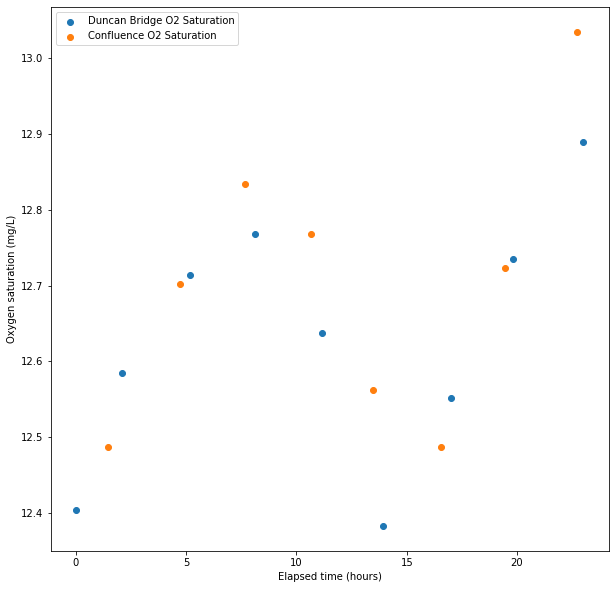

In [13]:
# Difference in O2 saturation, diffusion adjusted
diffusion_O2_sat = difference_O2_sat * 0.8
plt.figure(figsize = (10,10))
plt.xlabel("Elapsed time (hours)")
plt.ylabel("Oxygen saturation (mg/L)")

# O2 Saturation over time
plt.scatter(duncan_times, duncan_O2_sat, label = 'Duncan Bridge O2 Saturation')
plt.scatter(confluence_times, confluence_O2_sat, label = 'Confluence O2 Saturation')
plt.legend()

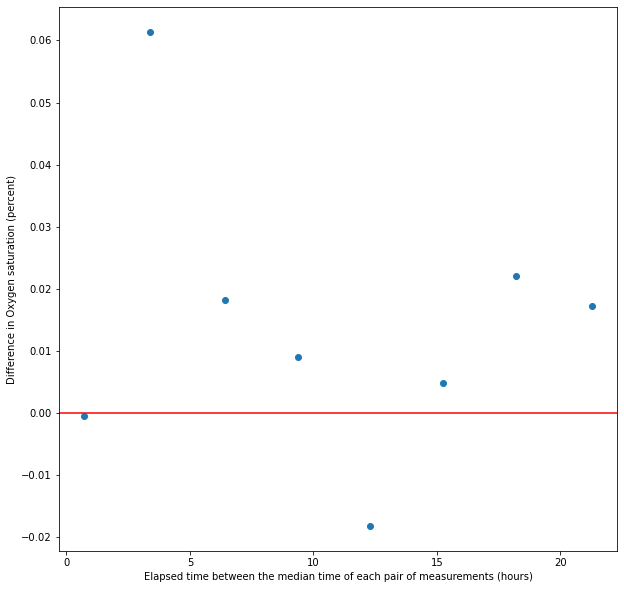

In [9]:
# Difference in O2 Saturation over time
plt.figure(figsize = (10,10))
plt.xlabel("Elapsed time between the median time of each pair of measurements (hours)")
plt.ylabel("Difference in Oxygen saturation (percent)")
plt.scatter(difference_times, difference_O2_sat)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

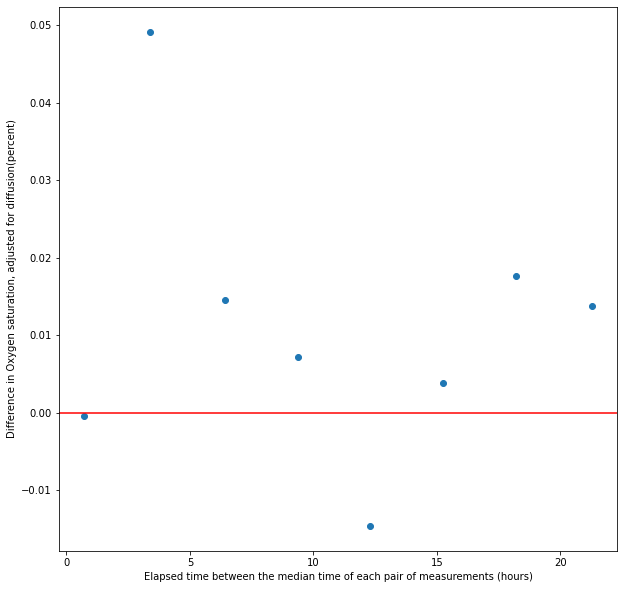

In [15]:
# parts per million or mg/L = g/m^3 per hour

# we want decreasing at night for respiration until 6 or 7 in morning
# connect the 3rd dot to the 6th dot (respiration during day)
# integrated area from 3rd to 6th is the photosynthesis
# we want up in daytime and down in nighttime
# look at new hope creek paper, do diffusion corrections
# (assume coeff of 1 gram O2 per sq meter per hour at 100% under saturation (zero O2 in the water), 1*.8 if at 80% saturation, i'll have .2 grams instead of 1)
# Difference in O2 Saturation over time, diffusion adjusted
plt.figure(figsize = (10,10))
plt.xlabel("Elapsed time between the median time of each pair of measurements (hours)")
plt.ylabel("Difference in Oxygen saturation, adjusted for diffusion(percent)")
plt.scatter(difference_times, diffusion_O2_sat)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()